<a href="https://colab.research.google.com/github/JaimieOnigkeit/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Jaimie_Onigkeit_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


#Part 1

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, p_pos_user):
  p_user = prob_drunk_prior
  p_pos_non_user = false_positive_rate
  p_non_user = 1-p_user
  numerator = p_pos_user * p_user
  denomenator = (p_pos_user * p_user) + (p_pos_non_user * p_non_user)
  posterior = numerator/denomenator

  return(posterior)


In [27]:
prob_drunk_given_positive(1/1000, 0.08, 1)

0.012357884330202669

What is the probability that a person is drunk after one positive breathalyzer test?

0.012357884330202669 or just over 1%

In [38]:
prior = 1/1000
p_drunk_posterior = []
for i in range(0,5):
  prior = prob_drunk_given_positive(prior, .08, 1)
  p_drunk_posterior.append(prior)

p_drunk_posterior

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734]

What is the probability that a person is drunk after two positive breathalyzer tests?

 0.13525210993291495 or only slightly higher than with one test (1.2% vs 1.35%)

How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

After four tests, there's a 96% chance the person is drunk.

#Part 2


In [0]:
?stats.bayes_mvs()

In [40]:
#This is just a dummy data set I made up to work on visualizations
#It includes a date and two variable columns that each contain a random number between 1 and 100
#And 100 rows
from google.colab import files
uploaded = files.upload()

Saving dummy.csv to dummy.csv


In [42]:
df = pd.read_csv('dummy.csv')

print(df.shape)
df.head()

(100, 3)


,date,var1,var2
0,2-Aug-80,7,55
1,22-Sep-80,21,61
2,3-Jan-81,77,16
3,20-Aug-81,33,93
4,3-Apr-82,64,85


In [43]:
var1 = df['var1']

var1

0      7
1     21
2     77
3     33
4     64
      ..
95    52
96    43
97    84
98    33
99    89
Name: var1, Length: 100, dtype: int64

In [45]:
CI, _, _ = stats.bayes_mvs(var1, alpha=.95)

CI

Mean(statistic=47.66, minmax=(42.22130015989882, 53.098699840101176))

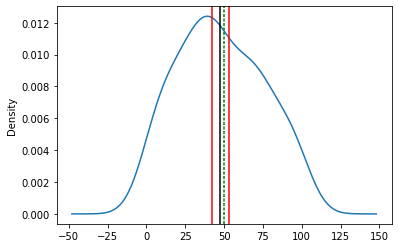

In [54]:
df['var1'].plot.density()
plt.axvline(x=42.22130015989882, color = 'red')
plt.axvline(x=47.66, color='black')
plt.axvline(x=53.098699840101176, color='red')
plt.axvline(x=50, color='green', dashes= (2,1))
plt.show()

Given that I made this data set to have random numbers between 0 and 50, I know the population mean, which is 50 (green dashed line). The mean of this sample is 47.66 (black line), and there's a 95% chance the population mean lies between 42.22 and 53.09 (red lines). 



# Part 3

Bayesian statistics are more flexible and adaptable. For example, say you have a hypothesis. With frequentist statistics you have to collect a lot of samples, test, the evaluate your hypothesis. If you decide you want to tweak your hypothesis, you have to collect samples again, re-test, and so on and so forth until you have something meaningful.

With Bayesian statistics, you can adapt your experiment to learn from insights and adapt, which can get you meaningful results faster.



## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

I'm working on the PyMC3 tutorials in a separate notebook. Here's the link:

https://colab.research.google.com/drive/1suGGpxzPB4nFX71WI_V7vm4JEJOZ-aH5
